## Importing Required Libraries

In [56]:
#pip install ydata_profiling

In [57]:
# import python libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Success metrics for the models
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.preprocessing import MinMaxScaler   # to scale numeric features
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 

# Algorithms for using supervised learning methods
from sklearn.ensemble import  RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_selection import SelectFromModel

# Feature Importance Explainable AI Libraries
import shap
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.inspection import permutation_importance

from ydata_profiling import ProfileReport

import warnings  # filtering the future warnings
warnings.filterwarnings('ignore')

sns.set()

## Creating DataFrame & Data Understanding

In [58]:
df = pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [59]:
# Check shape of dataframe  rows * columns
df.shape

(569, 32)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [61]:
df.describe().T   # statistical description of numeric features

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


## Data Preprocessing Feature Engineering -Exploratory Data Analysis

Dropping Unnecessory Features
- No need of unique features whic named as 'id' in dataset

In [62]:
df.drop(labels= ['id'], axis=1, inplace= True)

Checking missing values & duplicated values

In [63]:
df.isnull().values.any()  # No missing values to deal with

False

In [64]:
df.duplicated().any()  # there is no duplicated features to be dropped or deal with

False

Correlation Matrix for Numerical Features

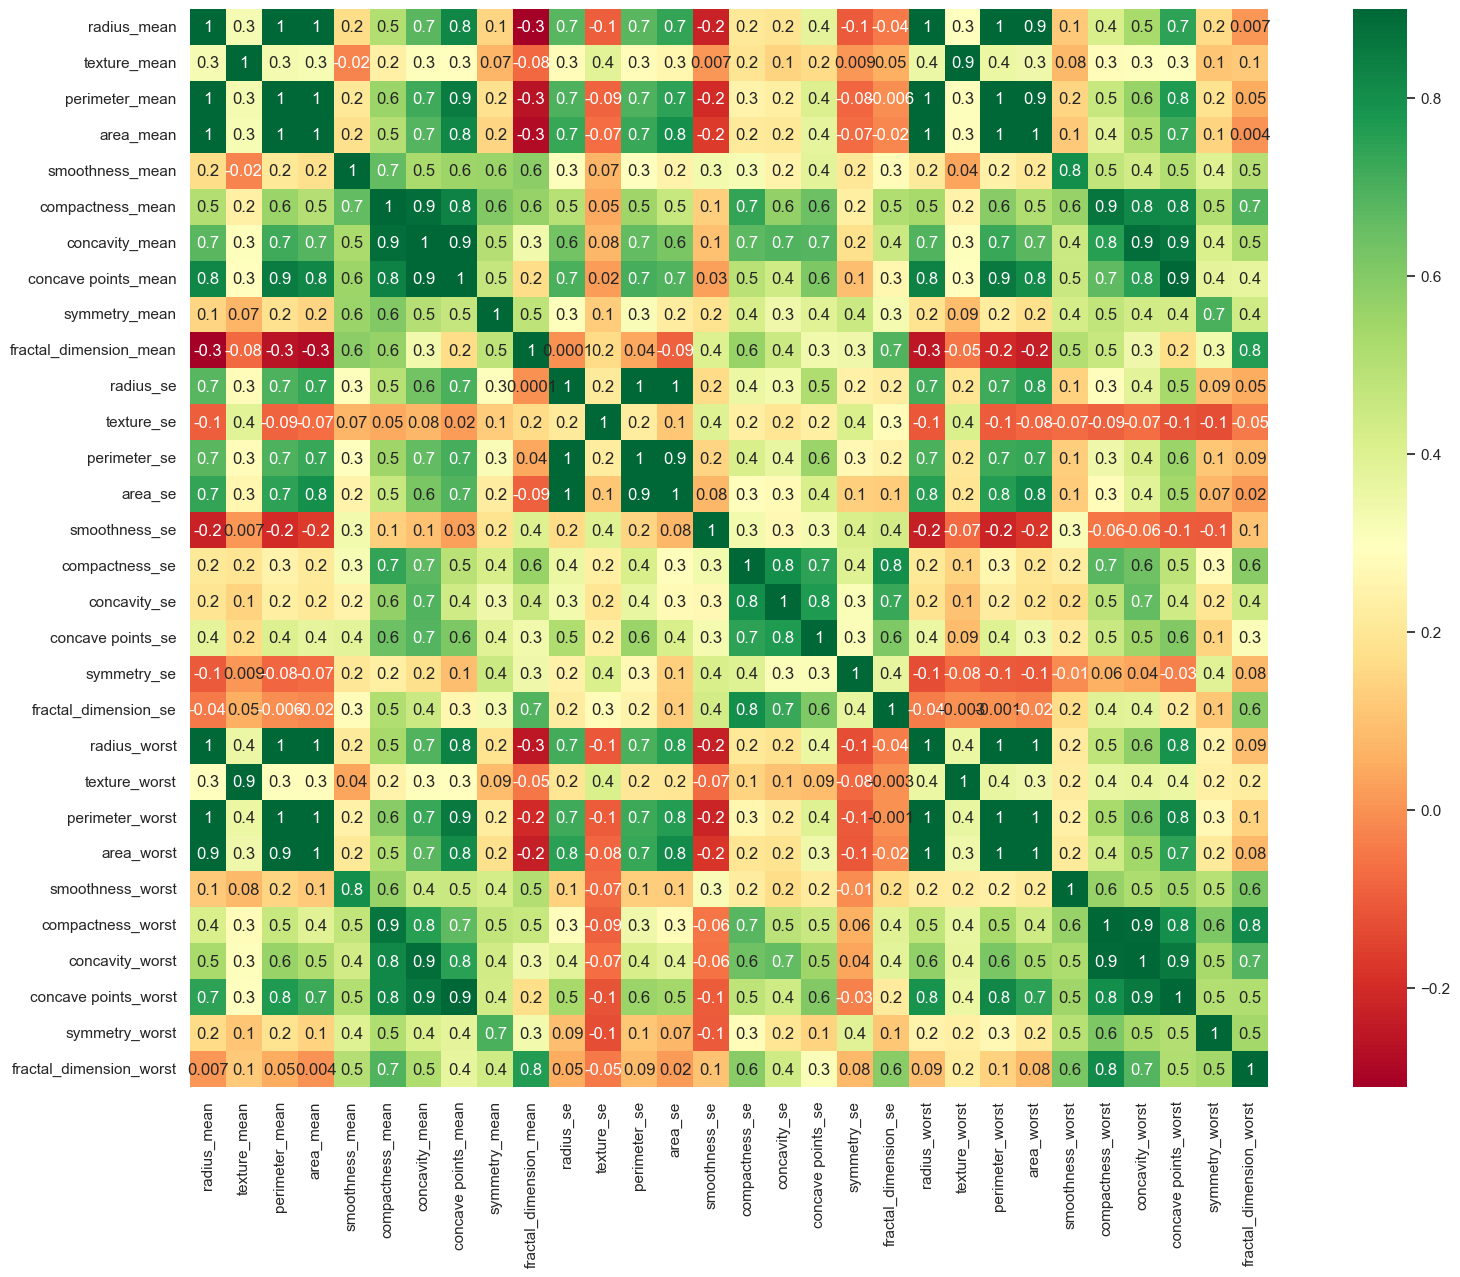

In [65]:
corrmat = df.corr()
plt.subplots(figsize= (22,14))
sns.heatmap(corrmat, annot= True, vmax= 0.9, square= True, cmap= 'RdYlGn', fmt= '.0g')
plt.show()

Analysis of 'diagnosis' Feature

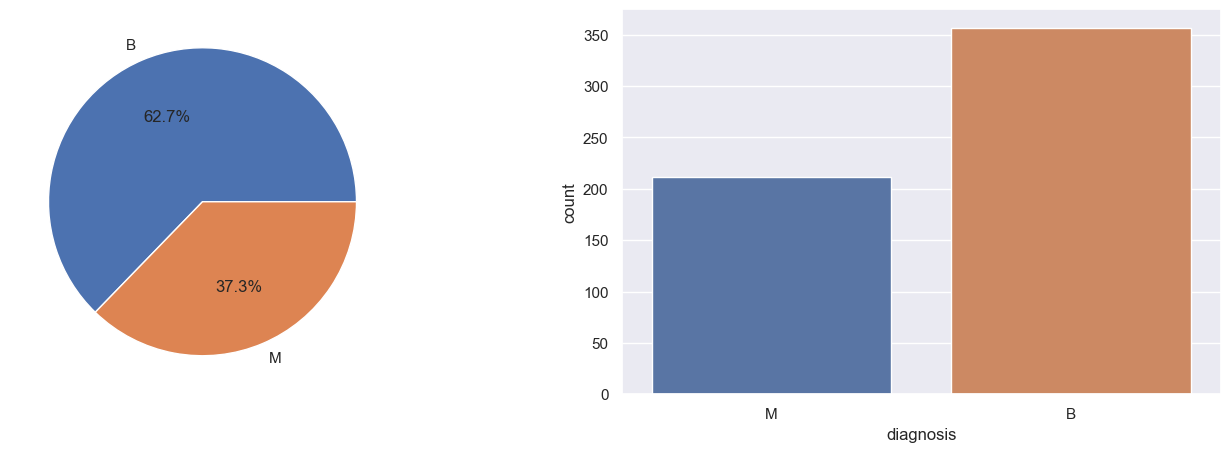

In [66]:
f, ax = plt.subplots(1,2, figsize= (17,5))
df.diagnosis.value_counts().plot.pie(autopct= '%1.1f%%', ax= ax[0], label= "")
sns.countplot(data= df, x= 'diagnosis')
plt.show()

Appyling Normalization
- Normalization is the process of transform values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variable variance is 1, or scaling the variance so the variable values range from 0 to 1.
- example, Min-Max Scaling technique is applied.

In [67]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [68]:
transformer = MinMaxScaler()
def scaling(columns):
    return transformer.fit_transform(df[columns].values.reshape(-1, 1))

column_to_be_sclaed = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

for i in column_to_be_sclaed:
    df[i] = scaling(i)
    
df.sample(6)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
75,M,0.430167,0.336152,0.416765,0.285981,0.352532,0.198945,0.228889,0.329920,0.372727,...,0.421202,0.334222,0.390408,0.255063,0.520571,0.171930,0.225958,0.522337,0.213877,0.057917
79,B,0.278243,0.280352,0.272269,0.153892,0.421685,0.233360,0.091120,0.115060,0.332323,...,0.224475,0.341151,0.206534,0.107378,0.381232,0.181244,0.138259,0.272371,0.239306,0.158337
336,B,0.284396,0.152858,0.278419,0.157285,0.379074,0.246212,0.087582,0.104274,0.298990,...,0.205977,0.130330,0.184123,0.096048,0.284158,0.165139,0.115815,0.201031,0.170905,0.300800
30,M,0.551328,0.520798,0.559809,0.400636,0.485420,0.519355,0.543346,0.618290,0.567172,...,0.541444,0.586087,0.548284,0.364923,0.514627,0.386539,0.489856,0.635052,0.370392,0.280598
6,M,0.533343,0.347311,0.523875,0.380276,0.379164,0.274891,0.264058,0.367793,0.370707,...,0.531839,0.416844,0.511928,0.349194,0.482269,0.223448,0.302236,0.663918,0.295289,0.187853
551,B,0.196365,0.430504,0.191417,0.099639,0.388463,0.191890,0.113027,0.112177,0.489899,...,0.145500,0.432836,0.136411,0.061787,0.247837,0.146414,0.124920,0.220378,0.316184,0.165814


## Machine Learning Modeling

Train-Test Split
- Splitting the dataset into traing & testing as 75% training and 25% testing

In [69]:
X = df.drop(['diagnosis'], axis= 1)
y = df['diagnosis']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 123)

In [71]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
540,0.215770,0.159959,0.213254,0.110032,0.426198,0.284093,0.157849,0.128926,0.382828,0.376158,...,0.154038,0.204158,0.141292,0.066998,0.418213,0.179013,0.143530,0.237732,0.150601,0.172504
260,0.630839,0.586743,0.615783,0.485472,0.427643,0.274278,0.355904,0.463867,0.380808,0.121314,...,0.583422,0.723348,0.557249,0.407688,0.535099,0.259248,0.302556,0.583162,0.312636,0.163649
410,0.207251,0.265810,0.198328,0.108717,0.324546,0.103521,0.065206,0.104374,0.273232,0.193134,...,0.182142,0.647655,0.172618,0.082604,0.489533,0.130890,0.144649,0.298900,0.277548,0.146989
26,0.359648,0.399729,0.370534,0.212641,0.476393,0.513527,0.333880,0.436531,0.602020,0.406066,...,0.344717,0.564765,0.358534,0.174916,0.537080,0.618030,0.442412,0.928179,0.532032,0.475272
498,0.544702,0.264119,0.535623,0.392153,0.438476,0.344519,0.349344,0.456412,0.389899,0.358256,...,0.527215,0.289446,0.478062,0.347719,0.462458,0.273219,0.282188,0.571478,0.186280,0.258494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.218609,0.105851,0.211112,0.114146,0.335831,0.171370,0.098313,0.166501,0.282828,0.334035,...,0.182497,0.136994,0.162110,0.080441,0.475005,0.153108,0.153514,0.290344,0.237926,0.213302
322,0.278243,0.122083,0.269712,0.153256,0.548614,0.211521,0.089035,0.168986,0.243939,0.311710,...,0.217360,0.241471,0.211116,0.101824,0.551608,0.189976,0.143051,0.396907,0.161049,0.199987
382,0.239907,0.439973,0.241587,0.129077,0.150943,0.269677,0.186106,0.148012,0.072222,0.350253,...,0.165066,0.444829,0.184023,0.074518,0.111074,0.285347,0.232588,0.375258,0.123398,0.252197
365,0.636992,0.408184,0.622003,0.487593,0.350907,0.287467,0.229592,0.386928,0.281818,0.118155,...,0.582711,0.382463,0.551771,0.391958,0.406326,0.204044,0.215815,0.606529,0.205795,0.080742


In [72]:
y_train

540    B
260    M
410    B
26     M
498    M
      ..
98     B
322    B
382    B
365    M
510    B
Name: diagnosis, Length: 426, dtype: object

## Model 1 - Logistic Regression Classifier

- Logistic regression is a classification algorithm, used when the value of the target variable is categorical in nature.
- It is commonly used when the data in question has binary output, so when it belongs to one class to another, or is either a 0 or 1.
- This method will be used a baseline model.

In [73]:
# Object creation, fitting the data and getting predictions
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

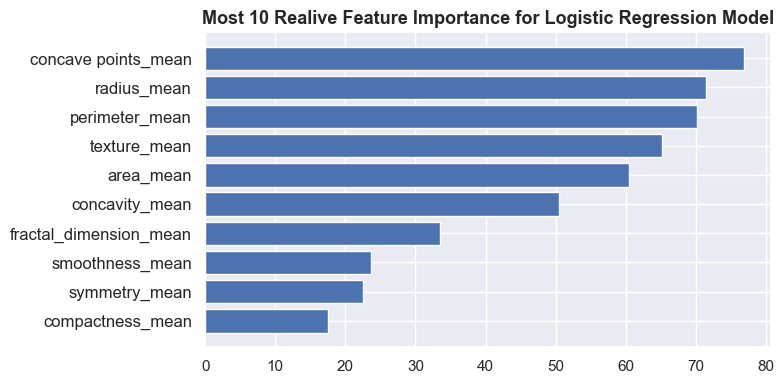

In [74]:
# Feature Importances
feature_importance = abs(lr.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())[0:10]
sorted_idx = np.argsort(feature_importance)[0:10]
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize= (8,4))
featex = featfig.add_subplot(1, 1, 1)
featex.barh(pos, feature_importance[sorted_idx], align= 'center')
plt.title('Most 10 Realive Feature Importance for Logistic Regression Model', fontsize= 13, fontweight= 'bold')
featex.set_yticks(pos)
featex.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize= 12)

plt.tight_layout()
plt.show()

In [75]:
print("🔺🔺🔺🔺🔺🔺🔺🔺🔺🔺 Logistic Regression Classifier Model Results 🔺🔺🔺🔺🔺🔺🔺🔺🔺🔺")
print('Accuracy score for testing set:  ', round(accuracy_score(y_test, y_pred_lr),5))
print('F1 score for testing set:        ', round(f1_score (y_test,y_pred_lr, average= 'weighted'),5))
print('Recall score for testing set:    ', round(recall_score(y_test, y_pred_lr, average= 'weighted'),5))
print('Precision score for testing set: ', round(precision_score(y_test, y_pred_lr, average= 'weighted'), 5))

cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

🔺🔺🔺🔺🔺🔺🔺🔺🔺🔺 Logistic Regression Classifier Model Results 🔺🔺🔺🔺🔺🔺🔺🔺🔺🔺
Accuracy score for testing set:   0.97203
F1 score for testing set:         0.9718
Recall score for testing set:     0.97203
Precision score for testing set:  0.97323
[[89  0]
 [ 4 50]]


## Model 2 - KNN Classifier

- The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other. KNN algoritm assumes the similarity between the new case/data and available cases and put the new case into the category that is  similar  to the most available categories.

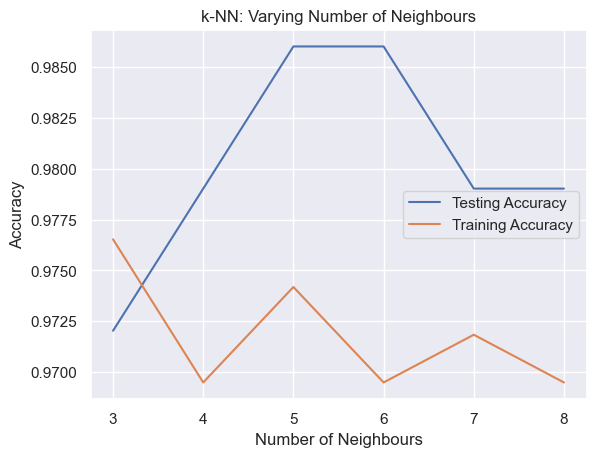

In [76]:
# KNN
# the following codes creates 9 models for each k value from 3 to 9 and show the training and testing accuracies for each k.
# when k gets higher, the model gets more complicated and requires more computional power and time.
# 3 looks good from the figure below according to accuracies

neighbours = np.arange(3,9)
train_accuracy = np.empty(len(neighbours)) 
test_accuracy = np.empty(len(neighbours))

for i,k in enumerate(neighbours):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.title('k-NN: Varying Number of Neighbours')
plt.plot(neighbours, test_accuracy, label= 'Testing Accuracy')
plt.plot(neighbours, train_accuracy, label= 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbours')
plt.ylabel('Accuracy')
plt.show()

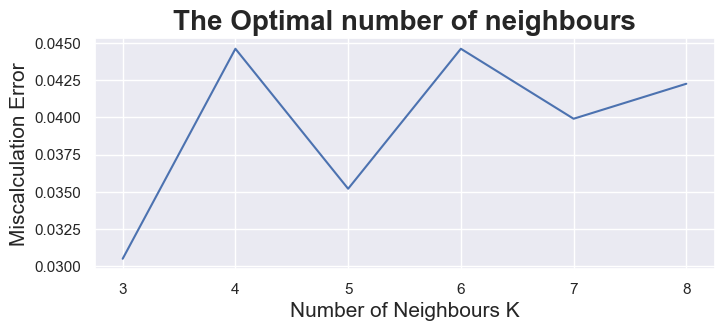

In [77]:
k_list = list(range(3,9,1))
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors= k)
    scores = cross_val_score(knn, X_train, y_train, cv=3, scoring= 'accuracy')
    cv_scores.append(scores.mean())
    
MSE = [1 - x for x in cv_scores]

plt.figure(figsize= (8,3))
plt.title('The Optimal number of neighbours', fontsize= 20, fontweight= 'bold')
plt.xlabel('Number of Neighbours K', fontsize= 15)
plt.ylabel('Miscalculation Error', fontsize= 15)
sns.set_style('whitegrid')
plt.plot(k_list, MSE)

plt.show()

In [78]:
knn = KNeighborsClassifier(n_neighbors= 3) # k=5
knn_model = knn.fit(X_train, y_train)   # creating the model
y_pred_knn = knn.predict(X_test)  # Claculating the predictions using the model

In [79]:
print('🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸 KNN MODEL RESULTS 🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸')
print('Accuracy score for testing set :', round(accuracy_score(y_test, y_pred_knn),5))
print('F1 score for testing set       : ',round(f1_score(y_test, y_pred_knn, average= 'weighted'),5))
print('Recall score for testing set   : ', round(recall_score(y_test, y_pred_knn, average= 'weighted'),5))
print('Precision score for testing set: ', round(precision_score(y_test, y_pred_knn, average= 'weighted'),5))
cm_knn = confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸 KNN MODEL RESULTS 🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸
Accuracy score for testing set : 0.97203
F1 score for testing set       :  0.97203
Recall score for testing set   :  0.97203
Precision score for testing set:  0.97203
[[87  2]
 [ 2 52]]


# Model 3 - Random Forest Classifier

- Random forest is an ensemble machine learning algorithm 
- A forest is comprised of trees. Random forests creates trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator of the feature importance.

In [80]:
rf_model_final = RandomForestClassifier() # Object creation
rf_model_final.fit(X_train, y_train) # Fitting data into algorithm
y_pred_rf = rf_model_final.predict(X_test) # Getting the predictions

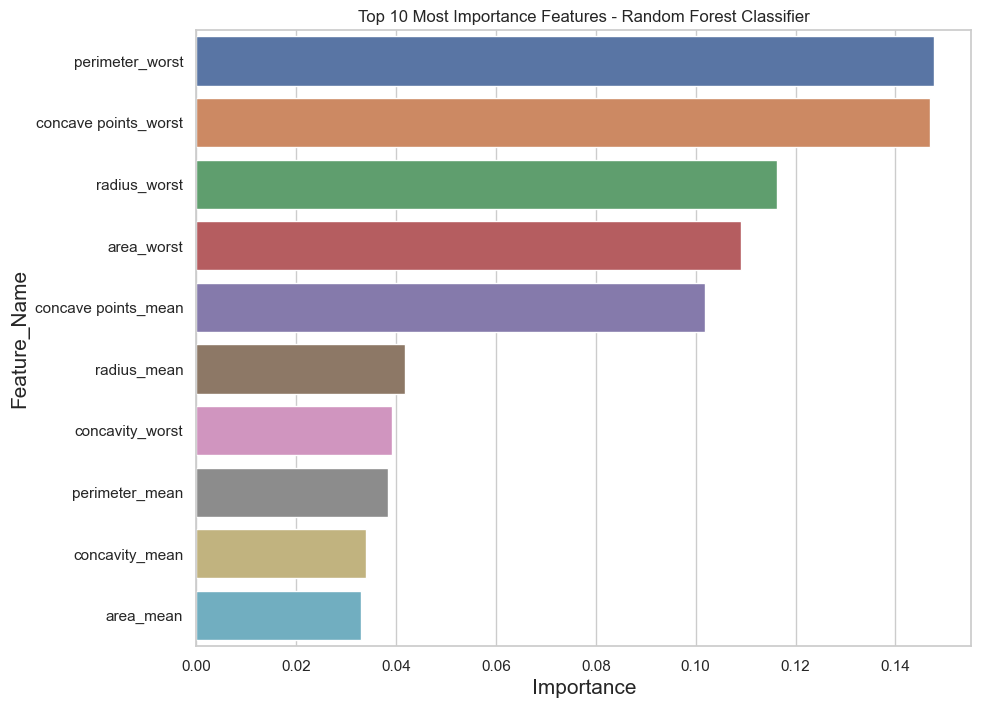

In [81]:
importance_df = pd.DataFrame({"Feature_Name": X.columns, "Importance":rf_model_final.feature_importances_})

sorted_importance_df = importance_df.sort_values(by= 'Importance', ascending= False).head(10)

plt.figure(figsize= (10,8))
sns.barplot(data= sorted_importance_df, x= 'Importance', y= 'Feature_Name')
plt.title('Top 10 Most Importance Features - Random Forest Classifier')
plt.xlabel('Importance', fontsize= 15)
plt.ylabel('Feature_Name', fontsize= 15)
plt.show()

In [82]:
print('🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹 KNN MODEL RESULTS 🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹')
print('Accuracy score for testing set :', round(accuracy_score(y_test, y_pred_rf),3))
print('F1 score for testing set       : ',round(f1_score(y_test, y_pred_rf, average= 'weighted'),3))
print('Recall score for testing set   : ', round(recall_score(y_test, y_pred_rf, average= 'weighted'),3))
print('Precision score for testing set: ', round(precision_score(y_test, y_pred_rf, average= 'weighted'),3))
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹 KNN MODEL RESULTS 🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹🔹
Accuracy score for testing set : 0.993
F1 score for testing set       :  0.993
Recall score for testing set   :  0.993
Precision score for testing set:  0.993
[[89  0]
 [ 1 53]]


# Model Comparisons

Accuracy Score (10-fold cross-validated)

Text(0.5, 1.0, 'Accuracy of the models')

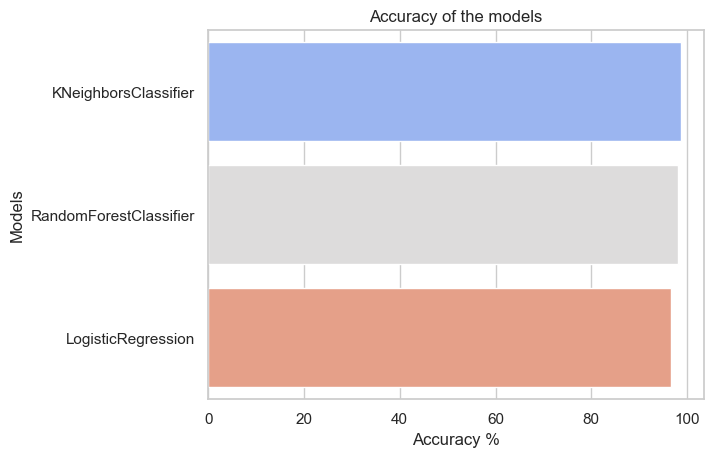

In [83]:
models = [knn_model, rf_model_final, lr]

result = []
results = pd.DataFrame(columns= ['Models', 'Accuracy'])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = cross_val_score(model, X_test, y_test, cv=10, scoring= 'accuracy').mean()
    result = pd.DataFrame([[names, accuracy*100]], columns= ['Models', 'Accuracy'])
    results = results.append(result)
    
sns.barplot(x= 'Accuracy', y= 'Models', data= results, palette= 'coolwarm')
plt.xlabel('Accuracy %')
plt.title('Accuracy of the models')

# KNeighboursClassifiers has performed the best for the given dataset (98.61%)
# RandomForestClassifier has performed the second best for the given dataset (97.33%)
# LogisticRegression has performed the third best for the given datset (96.57)

In [84]:
results.sort_values(by= 'Accuracy', ascending= False)

,Models,Accuracy
0,KNeighborsClassifier,98.619048
0,RandomForestClassifier,98.000000
0,LogisticRegression,96.571429


# F1 Score (10-fold cross-validated)

Text(0.5, 1.0, 'F1 of the models')

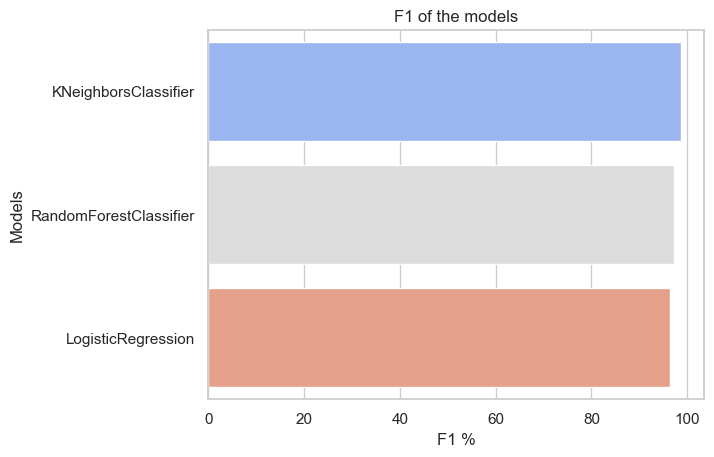

In [85]:
models = [knn_model,rf_model_final,lr]

result = []
results = pd.DataFrame(columns= ["Models","F1"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    f1 = cross_val_score(model,X_test,y_test,cv=10,scoring="f1_weighted").mean()  
    result = pd.DataFrame([[names, f1*100]], columns= ["Models","F1"])
    results = results.append(result)
    
sns.barplot(x= 'F1', y = 'Models', data=results, palette="coolwarm")
plt.xlabel('F1 %')
plt.title('F1 of the models')


# KNeighborsClassifier has performed the best for the given dataset (98.58%)
# RandomForestClassifier has performed the second best for the given dataset (96.67%)
# LogisticRegression has performed the third best for the given dataset (96.49%)

In [86]:
results.sort_values(by= 'F1', ascending= False)

,Models,F1
0,KNeighborsClassifier,98.585403
0,RandomForestClassifier,97.301089
0,LogisticRegression,96.491380


# Hyperparameter Tunning of Random Classifier

In [87]:
k_range = list(range(3, 15))
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
p= [1,2]

param_grid = dict(n_neighbors = k_range, algorithm= algorithm, p=p)

In [88]:
knn_model_cv = KNeighborsClassifier()
knn_cv_model = GridSearchCV(knn_model_cv, param_grid, cv=3, verbose=False).fit(X_train, y_train)
print('Best Parameters of KNN Classifier :' + str(knn_cv_model.best_params_))

# Best Parameters of KNN Classifier : {'algorithm': 'auto', 'n_neighbors': 3, 'p':2}

Best Parameters of KNN Classifier :{'algorithm': 'auto', 'n_neighbors': 3, 'p': 2}


In [89]:
knn_model_tuned = KNeighborsClassifier(algorithm='auto',n_neighbors=3,p=2) # Object creation
knn_model_tuned.fit(X_train,y_train) # Fitting the data into the algorithm
y_pred_knn_tuned = knn_model_tuned.predict(X_test) # Getting the predictions

In [90]:
print("🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲 TUNED KNN MODEL RESULTS 🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲 ")
print('Accuracy score for testing set : ',round(accuracy_score(y_test,y_pred_knn_tuned),5))
print('F1 score for testing set       : ',round(f1_score(y_test,y_pred_knn_tuned,average='weighted'),5))
print('Recall score for testing set   : ',round(recall_score(y_test,y_pred_knn_tuned,average='weighted'),5))
print('Precision score for testing set: ',round(precision_score(y_test,y_pred_knn_tuned,average='weighted'),5))
cm_knn_tuned = confusion_matrix(y_test, y_pred_knn_tuned)
print(cm_knn_tuned)

🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲 TUNED KNN MODEL RESULTS 🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲🌲 
Accuracy score for testing set :  0.97203
F1 score for testing set       :  0.97203
Recall score for testing set   :  0.97203
Precision score for testing set:  0.97203
[[87  2]
 [ 2 52]]


# Permutation Importance and Feature Importance for Random Forest Model

- Feature permutation is a model-agnostic global explanation method that provides insights into a machine learning model's behavior. 
It estimates and rank feature importance based ont the impact each feature has no the trained machine learning model's prediction

In [91]:
import termcolor

In [92]:
perm = PermutationImportance(knn_model_tuned, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm,feature_names = X_train.columns.tolist())

Weight,Feature
0.0178 ± 0.0141,texture_worst
0.0127 ± 0.0187,concave points_worst
0.0061 ± 0.0048,concavity_mean
0.0047 ± 0.0059,texture_se
0.0047 ± 0.0122,radius_worst
0.0038 ± 0.0097,concave points_mean
0.0038 ± 0.0048,compactness_se
0.0019 ± 0.0046,texture_mean
0.0014 ± 0.0101,smoothness_worst
0.0009 ± 0.0038,perimeter_worst


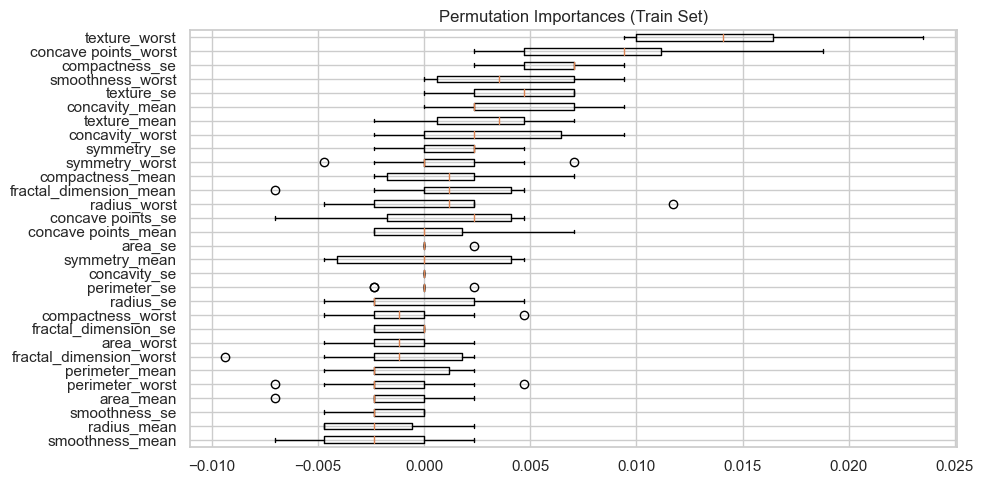

In [93]:
result = permutation_importance(knn_model_tuned, X_train.iloc[:,0:], y_train, n_repeats=10,random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(10,5))
ax.boxplot(result.importances[sorted_idx].T,vert=False, labels=X_train.iloc[:,0:].columns[sorted_idx])
ax.set_title("Permutation Importances (Train Set)")
fig.tight_layout()
plt.show()

# Applying Feature Selection Techniques 

1- SFS (Sequential Feature Selector)

In [94]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [95]:
knn = KNeighborsClassifier(algorithm='auto', n_neighbors=3, p=2)
sfs1 = SFS(knn, k_features=5, forward=True, floating=False, verbose=False, scoring='accuracy', cv=3, n_jobs=-1)
sfs1 = sfs1.fit(X, y)
sfs1.subsets_

{1: {'feature_idx': (22,),
  'cv_scores': array([0.86842105, 0.93157895, 0.89417989]),
  'avg_score': 0.8980599647266314,
  'feature_names': ('perimeter_worst',)},
 2: {'feature_idx': (22, 24),
  'cv_scores': array([0.95789474, 0.95789474, 0.92592593]),
  'avg_score': 0.9472384665367121,
  'feature_names': ('perimeter_worst', 'smoothness_worst')},
 3: {'feature_idx': (13, 22, 24),
  'cv_scores': array([0.96315789, 0.96842105, 0.94179894]),
  'avg_score': 0.9577926297224543,
  'feature_names': ('area_se', 'perimeter_worst', 'smoothness_worst')},
 4: {'feature_idx': (0, 13, 22, 24),
  'cv_scores': array([0.95789474, 0.96315789, 0.95767196]),
  'avg_score': 0.959574863083635,
  'feature_names': ('radius_mean',
   'area_se',
   'perimeter_worst',
   'smoothness_worst')},
 5: {'feature_idx': (0, 3, 13, 22, 24),
  'cv_scores': array([0.95263158, 0.96315789, 0.95767196]),
  'avg_score': 0.9578204771187228,
  'feature_names': ('radius_mean',
   'area_mean',
   'area_se',
   'perimeter_worst',


In [96]:
sfs1.k_feature_names_

('radius_mean', 'area_mean', 'area_se', 'perimeter_worst', 'smoothness_worst')

In [97]:
print('KNN Models', 'sfs1.scoring', 'score is: ', round(sfs1.k_score_,3))

KNN Models sfs1.scoring score is:  0.958


In [98]:
pd.DataFrame.from_dict(sfs1.get_metric_dict()).T.iloc[0:, 0:]

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(22,)","[0.868421052631579, 0.9315789473684211, 0.8941...",0.89806,"(perimeter_worst,)",0.05835,0.02593,0.018335
2,"(22, 24)","[0.9578947368421052, 0.9578947368421052, 0.925...",0.947238,"(perimeter_worst, smoothness_worst)",0.033913,0.01507,0.010656
3,"(13, 22, 24)","[0.9631578947368421, 0.968421052631579, 0.9417...",0.957793,"(area_se, perimeter_worst, smoothness_worst)",0.025905,0.011512,0.00814
4,"(0, 13, 22, 24)","[0.9578947368421052, 0.9631578947368421, 0.957...",0.959575,"(radius_mean, area_se, perimeter_worst, smooth...",0.005705,0.002535,0.001793
5,"(0, 3, 13, 22, 24)","[0.9526315789473684, 0.9631578947368421, 0.957...",0.95782,"(radius_mean, area_mean, area_se, perimeter_wo...",0.009673,0.004299,0.00304


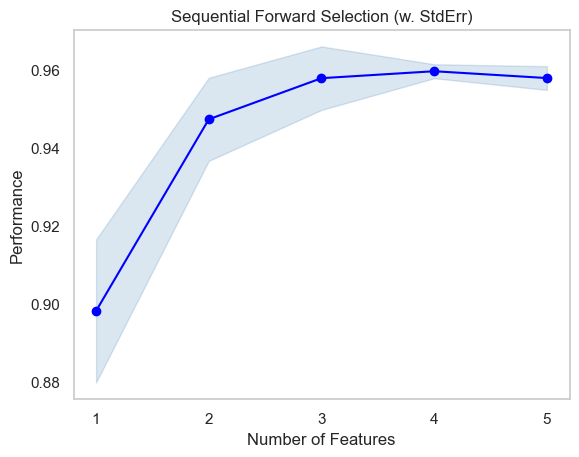

In [99]:
fig = plot_sfs(sfs1.get_metric_dict(), kind= 'std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [100]:
reduced_df_subsets = df[['radius_mean', 'area_mean', 'area_se', 'perimeter_worst', 'smoothness_worst', 'diagnosis']]

In [101]:
X_reduced = reduced_df_subsets.drop(['diagnosis'], axis=1)
y_reduced  = reduced_df_subsets['diagnosis']

X_train_sfs, X_test_sfs, y_train_sfs, y_test_sfs = train_test_split(X_reduced, y_reduced, test_size=0.30, random_state=42)

In [102]:
knn_model_sfs = KNeighborsClassifier(algorithm='auto',n_neighbors=3,p=2) # Object creation
knn_model_sfs.fit(X_train_sfs,y_train_sfs) # Fitting the data into the algorithm
y_pred_knn_sfs = knn_model_sfs.predict(X_test_sfs) # Getting the predictions

In [103]:
print("🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸 SFS APPLIED RANDOM FOREST MODEL RESULTS 🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸 ")
print('Accuracy score for testing set : ',round(accuracy_score(y_test_sfs,y_pred_knn_sfs),5))
print('F1 score for testing set       : ',round(f1_score(y_test_sfs,y_pred_knn_sfs,average='weighted'),5))
print('Recall score for testing set   : ',round(recall_score(y_test_sfs,y_pred_knn_sfs,average='weighted'),5))
print('Precision score for testing set: ',round(precision_score(y_test_sfs,y_pred_knn_sfs,average='weighted'),5))
cm_knn_sfs = confusion_matrix(y_test_sfs, y_pred_knn_sfs)
print(cm_knn_sfs)

🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸 SFS APPLIED RANDOM FOREST MODEL RESULTS 🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸🔸 
Accuracy score for testing set :  0.97661
F1 score for testing set       :  0.97653
Recall score for testing set   :  0.97661
Precision score for testing set:  0.97674
[[107   1]
 [  3  60]]


# Comparing Random Forest Models

In [104]:
comparison_frame = pd.DataFrame({'Model':['KNN Classifier (Default Parameters)',
                                          'KNN Classifier (GridSearchCV Applied)',
                                          'KNN Classifier (SFS Applied)'], 
                                 'F1 Score (Test Set)':[0.97203,0.97203,0.97661],
                                 'Recall (Test Set)':[0.97203,0.97203,0.97653], 
                                 'Precision (Test Set)':[0.97203,0.97203,0.97661],
                                 'Accuracy (Test Set)':[0.97203,0.97203,0.97674]}) 

comparison_frame.style.highlight_max(color = '#8c1aff', axis = 0)

,Model,F1 Score (Test Set),Recall (Test Set),Precision (Test Set),Accuracy (Test Set)
0,KNN Classifier (Default Parameters),0.972030,0.972030,0.972030,0.972030
1,KNN Classifier (GridSearchCV Applied),0.972030,0.972030,0.972030,0.972030
2,KNN Classifier (SFS Applied),0.976610,0.976530,0.976610,0.976740
